# Prediction of Heart Disease using Machine Learning 

This notebook is an attempt to build a machine learning model capable of predicting whether or not a patient is having heart disease based on their medical attributes, using various Python-based ML librarires.

Approach to build the machine learning model:
1. Analysing the Problem defination
2. Retrieving the Data
3. Evaluating the predictions made by the model
4. Features
5. Modelling
6. Experimentation

## 1. Problem defination

>Can we predict whether or not a patient is having heart disease considering the medical attributes of the patient? 

## 2. Data

>The data being used in this ML model is available on Kaggle.
>https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
## 3. Evaluation

> We will pursue the project if we reach an accuracy of 98% or >99% in predicting whether or not the patient is having heart disease.
## 4. Features

**The data Dictionary**

- age
- sex
- chest pain type (4 values)
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect

## Preparing the tools

Pandas, Numpy and Matplotlib are the tools we use for data analysis and manipulation.


In [1]:
#importing the tools(regular EDA and plotting libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importing the models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay

#importing time 
import time

In [2]:
#to ignore the update warnings by jupyter notebook
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
heart_df = pd.read_csv("data/heart.csv")
heart_df.shape

(1025, 14)

## Data exploration

To findout more about the data

1. What questions are we trying to solve?
2. What kind of data we are having and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#finding out how many of each class there
heart_df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

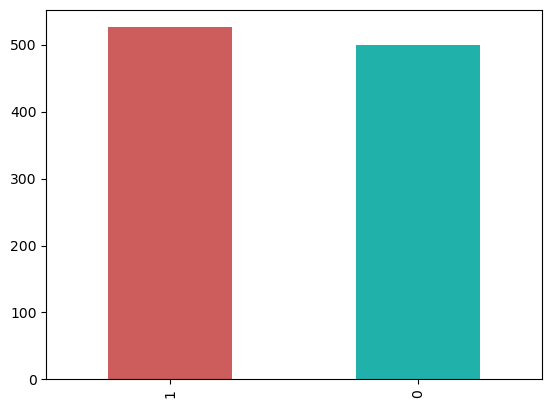

In [6]:
heart_df["target"].value_counts().plot(kind="bar", color=["indianred", "lightseagreen"]);

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#checking if there are any missing values
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease dependancy on Age and Maximum Heart Rate

In [10]:
heart_df.age[heart_df.target==1]

5       58
10      71
12      34
15      34
16      51
        ..
1011    45
1014    44
1019    47
1020    59
1023    50
Name: age, Length: 526, dtype: int64

In [11]:
heart_df.thalach[heart_df.target==1]

5       122
10      125
12      192
15      192
16      142
       ... 
1011    170
1014    175
1019    143
1020    164
1023    159
Name: thalach, Length: 526, dtype: int64

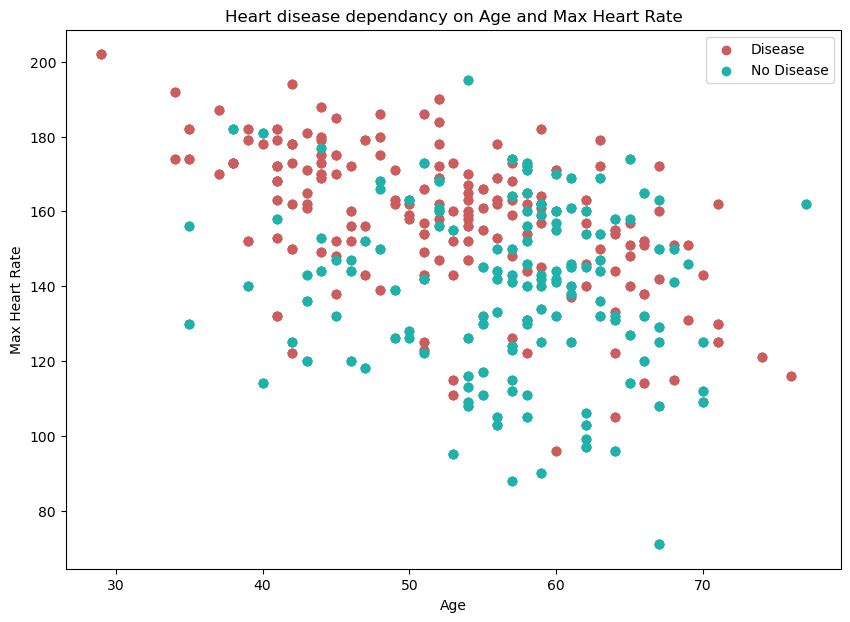

In [12]:
#create a figure
plt.figure(figsize=(10,7))

#scatter plot for 1
plt.scatter(heart_df.age[heart_df.target==1],
           heart_df.thalach[heart_df.target==1],
           c="indianred")

#scatter plot for 0
plt.scatter(heart_df.age[heart_df.target==0],
           heart_df.thalach[heart_df.target==0],
           c="lightseagreen");
#format
plt.title("Heart disease dependancy on Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Heart Disease dependancy on Sex

In [13]:
heart_df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [14]:
#comparing target with sex
pd.crosstab(heart_df.target, heart_df.sex)

sex,0,1
target,,
0,86,413
1,226,300


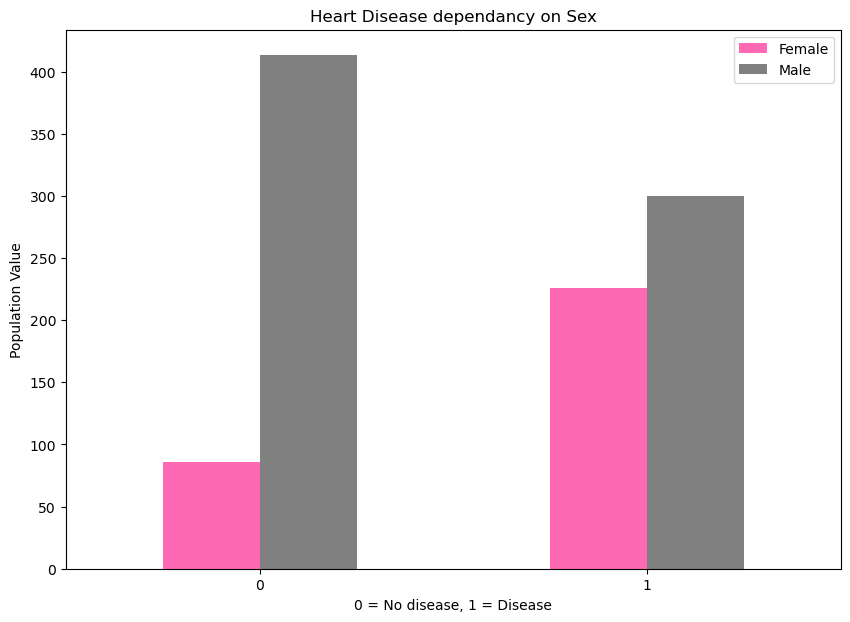

In [15]:
#plot for the crosstab comparision
pd.crosstab(heart_df.target, heart_df.sex).plot(kind="bar",
                                               figsize=(10,7),
                                               color=["hotpink", "grey"])
plt.title("Heart Disease dependancy on Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Population Value")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Heart Disease dependancy on the Chest Pain type

- chest pain type (4 values)
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic

In [16]:
pd.crosstab(heart_df.cp, heart_df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


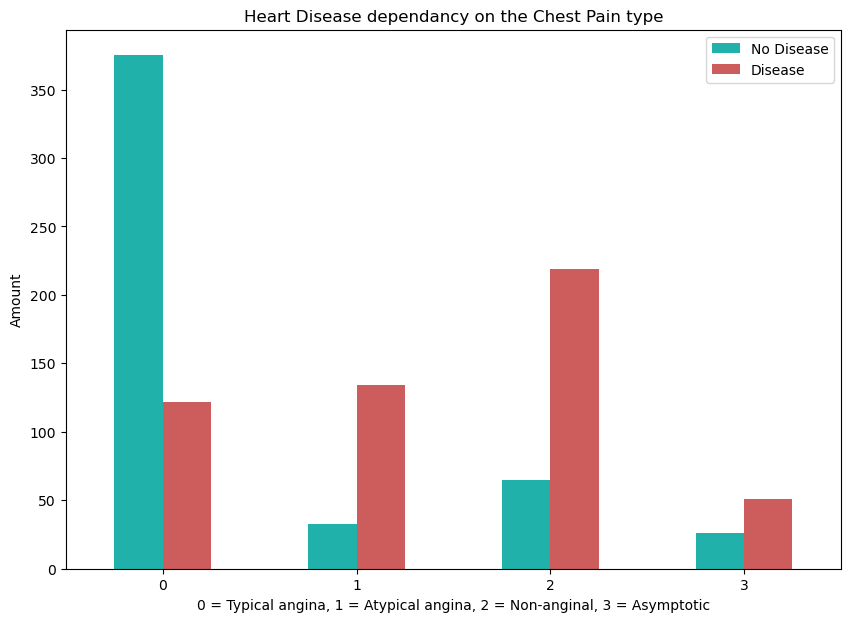

In [17]:
#plot for the crosstab comparision
pd.crosstab(heart_df.cp, heart_df.target).plot(kind="bar",
                                               figsize=(10,7),
                                               color=["lightseagreen", "indianred"])
plt.title("Heart Disease dependancy on the Chest Pain type")
plt.xlabel("0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal, 3 = Asymptotic")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Correlation Matrix

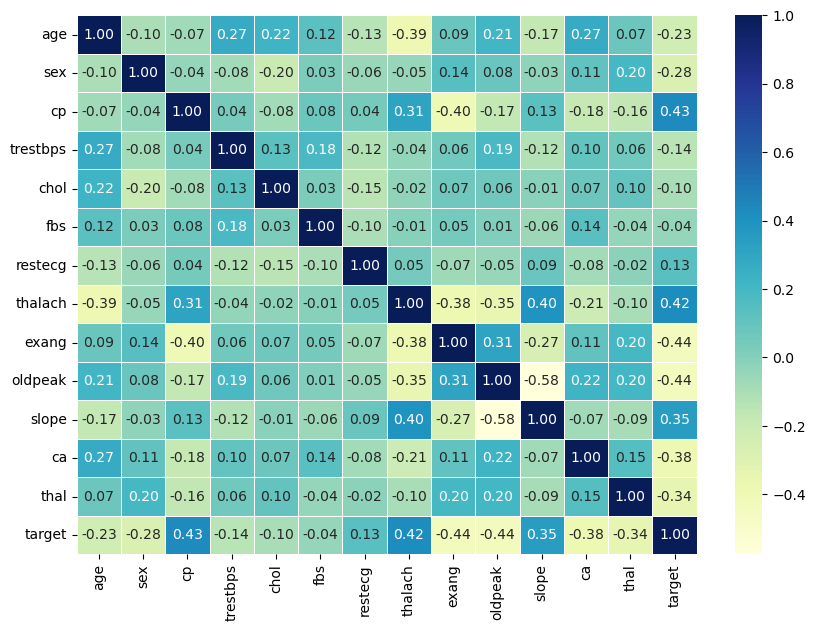

In [18]:
#building a correlation matrix
corr_mat = heart_df.corr()

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## 5. Modelling

In [19]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
#splitting data into X and y
X = heart_df.drop("target", axis=1)
y = heart_df["target"]

In [21]:
#splitting data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We are going to try 3 different machine learning models:
- Logistic Regression
- K-Nearest Neighbors Classifier
- Random Forest Classifier


And finally select the model which gives us the highest possible accurate results

In [22]:
#the model dictionary

models = {"Logistic Regressor": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

#function to fit and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    This function is to fit and evaluate the ML modles
    models : dictionary of Scikit-Learn ML models
    X_train : training data
    X_test : testing data
    y_train : training labels
    y_test : testing labels
    """
    np.random.seed(42)
    #dictionary to store the model scores
    mod_scores = {}
    #looping
    for name, model in models.items():
        #fit the model to the data we ahve splitted to train
        model.fit(X_train, y_train)
        #evaluate the model and add the score to the mod_scores dictionary
        mod_scores[name] = model.score(X_test, y_test)
    return mod_scores

In [23]:
mod_scores = fit_score(models=models,
                      X_train=X_train,
                      X_test=X_test,
                      y_train=y_train,
                      y_test=y_test)
mod_scores

{'Logistic Regressor': 0.7853658536585366,
 'K-Nearest Neighbors': 0.7317073170731707,
 'Random Forest Classifier': 0.9853658536585366}

### Model Comparision

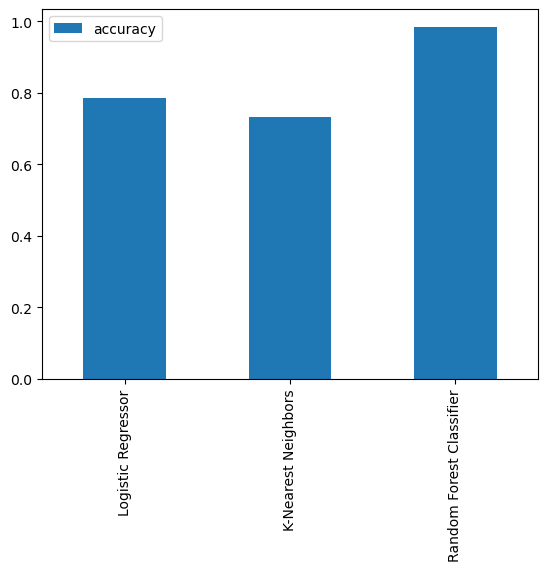

In [24]:
model_comp = pd.DataFrame(mod_scores, index=["accuracy"])
model_comp.T.plot.bar();

These are just the models first predictions, we are going to evaluate more by going through the following improvations and evaluation metrics:

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the ROC curve (AUC)

### Hyperparameter Tuning

In [25]:
#tuning K-Nearest Neighbors model
train_scores = []
test_scores = []

#experimenting with the n_neighbors parameter
neighbors = range(1,21)
kn = KNeighborsClassifier()

#loop
for i in neighbors:
    kn.set_params(n_neighbors=i)
    
    #fit the train dataset
    kn.fit(X_train, y_train)
    
    #adding scores to the scores list
    train_scores.append(kn.score(X_train, y_train))
    test_scores.append(kn.score(X_test, y_test))

Maximum K-Nearest Neighbors score on the test data: 98.54%


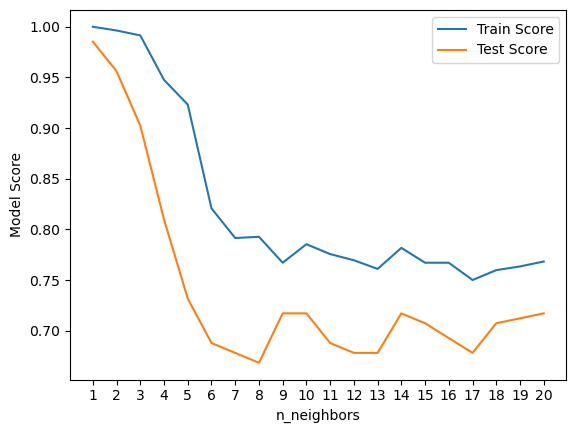

In [26]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("n_neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.xticks(np.arange(1,21,1))

print(f"Maximum K-Nearest Neighbors score on the test data: {max(test_scores)*100:.2f}%")

#### Hyperparameter tuning using RanadomizedSearchCV

Tuning...
* LogisticRegression model
* RandomForestClassifier model
* K-Nearest Neighbors model

In [27]:
#hyperparameter grid for Logisticregression
log_grid = {"C": np.logspace(-5, 5, 20),
           "solver":["liblinear"]}

#hyperparameter grid for RandomForestClassifier
ran_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

#hyperparameter grid fror K-Nearest Neighbors
kn_grid = {'n_neighbors': (1,10, 1),
            'leaf_size': (20,40,1),
            'p': (1,2),
            'weights': ('uniform', 'distance'),
            'metric': ('minkowski', 'chebyshev')}

Tuning models using the RandomizedSearchCV and the grids made


For LogisticRegression model

In [28]:
np.random.seed(42)

#setup random hyperparmeter search
rs_log = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
#fit RS model for LogisticRegression
rs_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 1.8329807108324339}

In [30]:
rs_log.score(X_test, y_test)

0.7853658536585366

For RandomForestClassifier model

In [31]:
np.random.seed(42)

#setup random hyperparmeter search
rs_ran = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=ran_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
#fit RS model for RandomForestClassifier model
rs_ran.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   verbose=True)

In [32]:
rs_ran.best_params_

{'n_estimators': 130,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [33]:
rs_ran.score(X_test, y_test)

0.9853658536585366

For K-Nearest Neighbors model

In [34]:
np.random.seed(42)

#setup random hyperparmeter search
rs_kn = RandomizedSearchCV(KNeighborsClassifier(),
                           param_distributions=kn_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
#fit RS model for K-Nearest Neighbors model
rs_kn.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': (20, 40, 1),
                                        'metric': ('minkowski', 'chebyshev'),
                                        'n_neighbors': (1, 10, 1), 'p': (1, 2),
                                        'weights': ('uniform', 'distance')},
                   verbose=True)

In [35]:
rs_kn.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 1,
 'metric': 'minkowski',
 'leaf_size': 20}

In [36]:
rs_kn.score(X_test, y_test)

0.9853658536585366

#### Hyperparameter tuning using GridSearchCV

Tuning...
* LogisticRegression model

In [37]:
#setup random hyperparmeter search
gs_log = GridSearchCV(LogisticRegression(),
                           param_grid=log_grid,
                           cv=5,
                           verbose=True)
#fit GS model for LogisticRegression
gs_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log.best_params_

{'C': 1.8329807108324339, 'solver': 'liblinear'}

In [39]:
gs_log.score(X_test, y_test)

0.7853658536585366

### Evaluating the tuned ML classifier

In [40]:
#Firstly, making poredictions
y_preds = rs_ran.predict(X_test)

In [41]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

#### ROC Curve

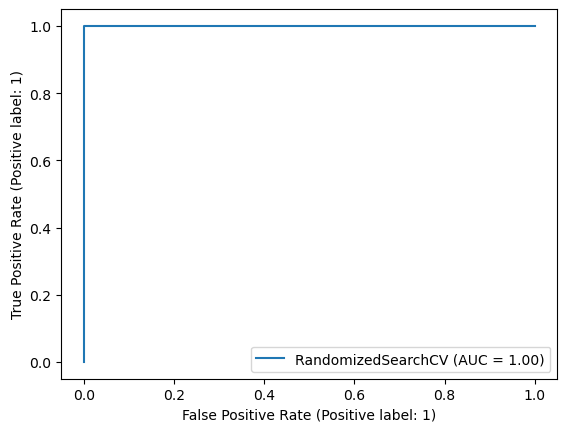

In [42]:
log_roc_disp = RocCurveDisplay.from_estimator(rs_ran, X_test, y_test)

#### Confusion Matrix

In [43]:
print(confusion_matrix(y_test, y_preds))

[[102   0]
 [  3 100]]


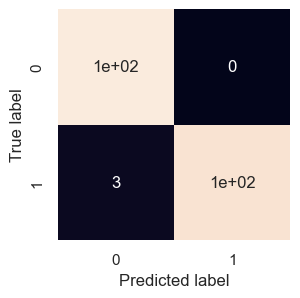

In [44]:
sns.set(font_scale=1) 

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

#### Classification Report

Accuracy, Precision, Recall and F1-score of the model by Cross Validation

In [45]:
rs_ran.best_params_

{'n_estimators': 130,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [46]:
gs_log.best_params_

{'C': 1.8329807108324339, 'solver': 'liblinear'}

In [47]:
rs_kn.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 1,
 'metric': 'minkowski',
 'leaf_size': 20}

In [48]:
#new classifier named model with best params
ran_model = RandomForestClassifier(n_estimators = 130,
                             min_samples_split =  5,
                             min_samples_leaf = 1,
                             max_features = 'auto',
                             max_depth = 80,
                             bootstrap = False)

log_model = LogisticRegression(C = 1.8329807108324339,
                               solver = 'liblinear')

kn_model = KNeighborsClassifier(weights='uniform',
                                p=1,
                                 n_neighbors=1,
                                 metric='minkowski',
                                 leaf_size=20)

In [49]:
#the  dictionary

models = {"Logistic Regressor": log_model,
          "K-Nearest Neighbors": kn_model,
          "Random Forest Classifier": ran_model}
metrics = {"Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1": make_scorer(f1_score)}

#function to cross validate the evaluation metrics
    
def cross_validate_metrics(models, metrics, X, y):
    
    """
    This function is to cross validate the ML modles evaluation metrics
    models : dictionary of Scikit-Learn ML models
    X : data
    y : labels
    metrics : name of the evaluation metrics to enter the scoring variable 
    """
    
    model_scores = {}

    for model_name, model in models.items():
        metric_scores = {}
        
        for metric_name, metric_func in metrics.items():
            scores = cross_val_score(model, X, y, cv=5, scoring=metric_func)
            mean_score = np.mean(scores)
            metric_scores[metric_name] = mean_score

        model_scores[model_name] = metric_scores
    return model_scores

In [50]:
model_scores = cross_validate_metrics(models, metrics, X, y)
model_scores

{'Logistic Regressor': {'Accuracy': 0.846829268292683,
  'Precision': 0.8223419020773868,
  'Recall': 0.8955256064690026,
  'F1': 0.8572933634753808},
 'K-Nearest Neighbors': {'Accuracy': 0.9882926829268293,
  'Precision': 0.9942857142857143,
  'Recall': 0.9828571428571429,
  'F1': 0.988488612836439},
 'Random Forest Classifier': {'Accuracy': 0.9941463414634146,
  'Precision': 0.9944954128440366,
  'Recall': 1.0,
  'F1': 0.9972093023255815}}

In [51]:
#function to plot cross validated graph for each model
def plot_bar_graph(model_scores):
    models = list(model_scores.keys())
    metrics = list(model_scores[models[0]].keys())
    num_models = len(models)
    num_metrics = len(metrics)

    # Create a bar plot for each model
    for i, model in enumerate(models):
        scores = [model_scores[model][metric] for metric in metrics]
        positions = np.arange(num_metrics)
        plt.bar(positions + i * (1 / num_models), scores, width=1 / num_models, label=model)

    # Set the x-axis labels and title
    plt.xticks(positions + 0.5, metrics)
    plt.xlabel('Metrics')
    plt.ylabel('Cross-validated scores')
    plt.title('Cross-validated scores for different models')
    
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    

    # Add a legend and show the plot
    plt.show()

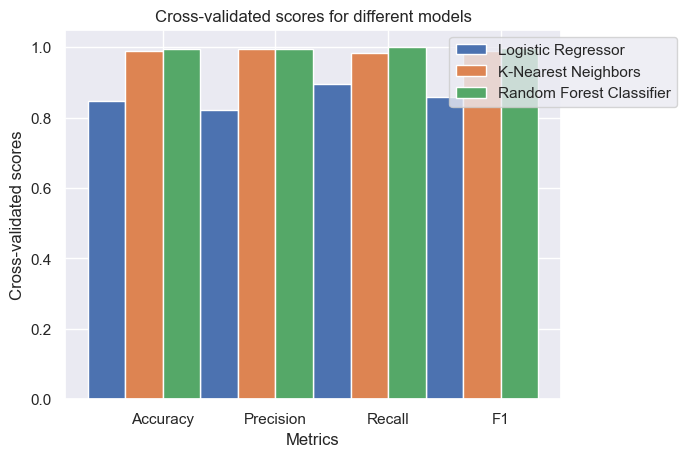

In [52]:
plot_bar_graph(model_scores)

By looking at the cross validated results we could see that the Random Forest Classifier
model is predicting the heart disease in the most accurate possible way.

### Feature Importance

Analysing the features which contributed the most to the outcome target value.

Finding the feature importance for the Random forest Classifier model.

In [53]:
#fit an instance of Random forest Classifier model
feature_names = [f"feature {i}" for i in range(X.shape[1])]

clf = RandomForestClassifier(n_estimators = 130,
                             min_samples_split =  5,
                             min_samples_leaf = 1,
                             max_features = 'auto',
                             max_depth = 80,
                             bootstrap = False)
clf.fit(X_train, y_train);

In [54]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.018 seconds


Let’s plot the impurity-based importance.

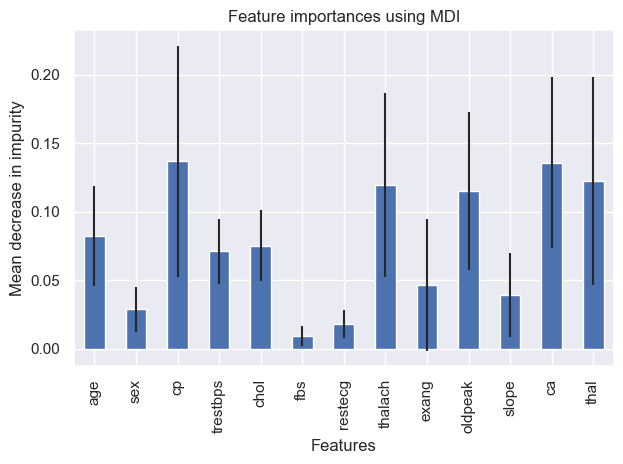

In [55]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel("Features")

ax.set_xticklabels(X.columns, rotation='vertical')

fig.tight_layout()

## Saving the Model

In [56]:
from joblib import dump, load

dump(clf, filename="heart_disease_random_forest_calssifier_model.joblib"); 